This file is part of the EDA (milestone 2).

Using different features, we clusterize the texts using K-means, and visualize the clusters using a PCA 2-d visualization.

# Imports

In [1]:
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
from tqdm.auto import tqdm
tqdm.pandas()

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

Mounted at /content/drive/


In [5]:
df.columns

Index(['url', 'story_id', 'soup', 'title', 'author', 'contest_num',
       'won_contest', 'num_likes', 'num_comments', 'story_html',
       'date_published', 'num_sent', 'story_sent', 'sent_lengths',
       'sent_avg_length', 'sent_words', 'story_word_toks', 'words',
       'punctuation', 'num_words', 'unique_words', 'num_unique_words',
       'unique_words_percent', 'text_str', 'age', 'words_exist_per_cent',
       'num_cats', 'cat_School', 'cat_Creative', 'cat_Age', 'cat_Happy',
       'cat_Thriller', 'cat_Friendship', 'cat_East', 'cat_Inspirational',
       'cat_Christian', 'cat_Bedtime', 'cat_Drama', 'cat_Horror',
       'cat_Lesbian', 'cat_High', 'cat_Science', 'cat_American',
       'cat_Speculative', 'cat_Funny', 'cat_Adventure', 'cat_Nonfiction',
       'cat_African', 'cat_Christmas', 'cat_Teens', 'cat_Fantasy',
       'cat_Holiday', 'cat_Western', 'cat_Young', 'cat_Coming', 'cat_Suspense',
       'cat_Romance', 'cat_Urban', 'cat_Latinx', 'cat_Desi', 'cat_Asian',
       'cat_Bl

In [6]:
# features discrimination
numerical = ['num_likes', 'num_comments', 'num_sent', 'sent_avg_length', 'num_words', 
             'num_unique_words', 'unique_words_percent', 'age', 'num_cats']
categories = [col for col in df if col.startswith('cat_')]
cols = numerical + categories

# Kmeans and PCA with all features (including target)

In [7]:
# choose the number of clusters
k = 3

# choose sample size
sample_size = 30


In [8]:
start = 100
ids = list(range(start, start+sample_size))
X = df[cols].iloc[ids]

scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
print(f'The shape of X is {X.shape}')

titles = df.iloc[ids].title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

The shape of X is (30, 58)


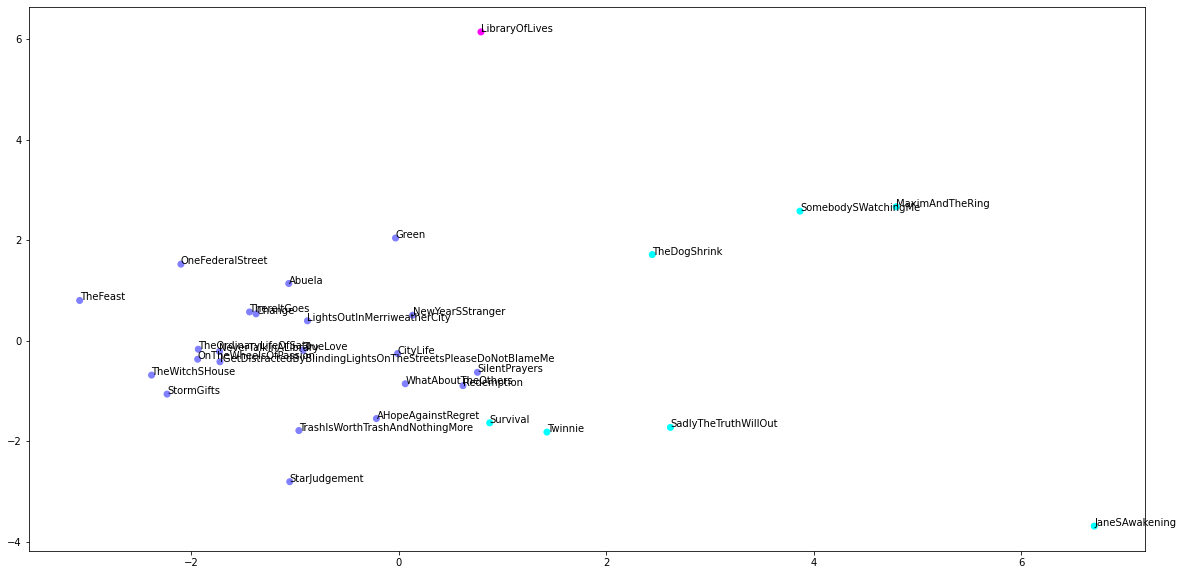

In [9]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = kmeans.labels_, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

In [10]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,num_words,num_unique_words,num_sent
1,num_likes,num_comments,cat_Horror


INTERPRETATION

The most important components are the lengths of the texts and the number of likes/comments that the texts received. The interpretation is therefore straightforward and not so interesting.

# Without num_comments and num_likes

In [11]:
# choose the number of clusters
k = 3

# choose sample size
sample_size = 30

In [12]:
cols_2 = list(set(numerical).union(set(categories)).difference(set(['num_comments', 'num_likes'])))
start = 100
ids = list(range(start, start+sample_size))
X = df[cols_2].iloc[ids]

scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
print(f'The shape of X is {X.shape}')

titles = df.iloc[ids].title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

The shape of X is (30, 56)


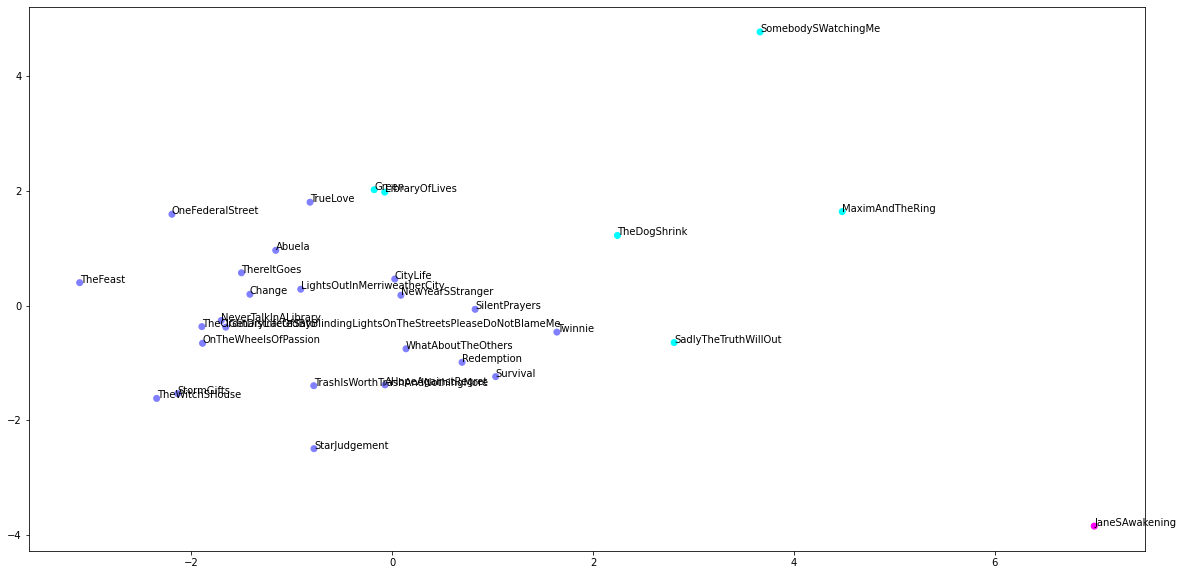

In [13]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

In [14]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,num_words,num_unique_words,num_sent
1,cat_Holiday,cat_Thriller,num_sent


Check relation of clusters to target:

INTERPRETATION

The length is still critical, but now categories come into action. It makes sense that the clusters follow the pre-established categories.

# Kmeans and PCA with CountVectorizer

## Preprocessing

### Lemmatization

Done in the feature extraction file. Variable: text_str_lem

### Stop words

In [15]:
stop_words = """
a
about
above
according
across
actually
adj
after
afterwards
again
all
almost
alone
along
already
also
although
always
among
amongst
an
and
another
any
anyhow
anyone
anything
anywhere
are
aren
around
as
at
be
become
because
become
becomes
becoming
been
before
beforehand
begin
beginning
behind
below
beside
besides
between
beyond
billion
both
but
by
can
cannot
caption
co
could
couldn
did
didn
do
does
doesn
don
down
during
each
eg
eight
eighty
either
else
elsewhere
end
ending
enough
etc
even
ever
every
everyone
everything
everywhere
except
few
fifty
first
five
for
former
formerly
forty
found
four
form
further
had
has
hasn
have
haven
he
hence
her
here
hereafter
hereby
herein
hereupon
hers
herself
him
himself
his
how
however
hundred
ie
if
in
inc
Indeed
instead
into
is
isn
it
its
itself
last
later
latter
latterly
least
less
let
like
likely
ll
ltd
made
make
makes
many
maybe
me
meantime
meanwhile
might
might
million
miss
more
moreover
most
mostly
mr
mrs
much
must
my
myself
namely
neither
never
nevertheless
next
nine
ninety
no
nobody
none
nonetheless
noon
nor
not
nothing
now
nowhere
of
off
often
on
once
one
only
onto
or
other
others
otherwise
our
ours
ourselves
out
over
overall
own
per
perhaps
rather
re
recent
recently
same
seem
seemed
seeming
seems
seven
seventy
several
she
should
shouldn
since
six
sixty
so
some
somehow
someone
sometime
sometimes
somewhere
still
stop
such
talking
ten
than
that
the
their
them
themselves
thence
there
thereafter
thereby
therefore
therein
therein
thereupon
these
they
thirty
this
those
though
thousand
three
through
throughout
thru
thus
to
together
too
toward
towards
trillion
twenty
two
under
unless
unlike
unlikely
until;
up
upon
us
used
using
ve
very
via
very
was
wasn
we
well
were
weren
what
whatever
when
whence
whenever
where
whereafter
whereas
whereby
wherein
whereupon
wherever
whether
which
while
whither
which
while
whither
who
whoever
whole
whom
whomever
whose
why
will
with
within
without
won
would
wouldn
yes
yet
you
your
yours
yourself
yourselves
num
party
agreement
shall
right
provide
section
term
product
"""
stop_list = stop_words.split('\n')

##Apply CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,3), 
                             stop_words=stop_list, 
                             max_features=500) #need to preprocess stopwords

In [38]:
stories_lemma = df.text_str_lem.tolist()[:2000]

In [39]:
%%time
label_vec = vectorizer.fit_transform(stories_lemma)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['indeed', 'until'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 26.1 s, sys: 765 ms, total: 26.8 s
Wall time: 29 s


In [40]:
stop_words = "\n".join(list(vectorizer.vocabulary_))
# print(stop_words)

In [41]:
cols = vectorizer.get_feature_names_out()

In [42]:
df_tf = pd.DataFrame(label_vec.toarray(), columns=cols)

In [43]:
df_tf.head(2)

,able,against,ago,air,answer,arm,ask,ask pron,away,away from,...,word,work,work pron,world,write,wrong,yeah,year,year pron,young
0,2,0,1,0,1,1,5,4,2,1,...,1,7,3,1,1,1,1,9,3,0
1,0,4,0,2,2,1,1,0,1,0,...,0,5,3,0,0,0,0,0,0,0


## Kmeans and PCA

In [44]:
# choose the number of clusters
k = 3

# choose sample size
sample_size = 30

In [47]:
start = 100
ids = list(range(start, start+sample_size))
X = df_tf[cols].iloc[ids]

scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
print(f'The shape of X is {X.shape}')

titles = df.iloc[ids].title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

The shape of X is (30, 500)


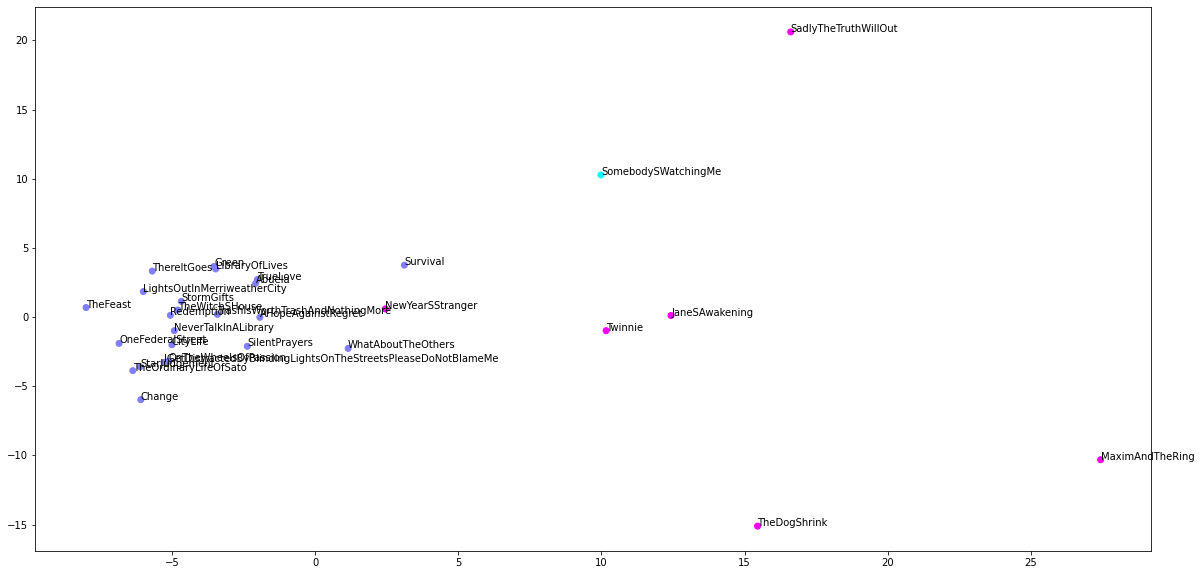

In [48]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

Check relation to target:

INTERPRETATION ---- need to read stories...

In [49]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,pron,think,think pron
1,mouth,pron reach,bag


# Kmeans and PCA with TF/IDF

## Apply TfidfVectorizer

In [50]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3), 
                             stop_words=stop_list, 
                             max_features=1000)
X = vectorizer.fit_transform(stories_lemma)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['indeed', 'until'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 23.7 s, sys: 401 ms, total: 24.1 s
Wall time: 24.1 s


In [51]:
cols = vectorizer.get_feature_names_out()

In [52]:
df_tfidf = pd.DataFrame(X.toarray(), columns=cols)

In [53]:
df_tfidf.head(2)

,able,accept,act,add,against,against pron,age,ago,ago pron,agree,...,wrong pron,yeah,yeah pron,year,year ago,year old,year pron,yell,yellow,young
0,0.010262,0.0,0.0,0.006242,0.000000,0.000000,0.0,0.004875,0.006242,0.0,...,0.00683,0.006132,0.006932,0.029468,0.006718,0.006566,0.01431,0.006454,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.043338,0.030015,0.0,0.000000,0.000000,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0


##EDA

In [62]:
# choose the number of clusters
k = 4

# choose sample size
sample_size = 30

In [63]:
start = 100
ids = list(range(start, start+sample_size))
X = df_tfidf[cols].iloc[ids]

scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
print(f'The shape of X is {X.shape}')

titles = df.iloc[ids].title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

The shape of X is (30, 1000)


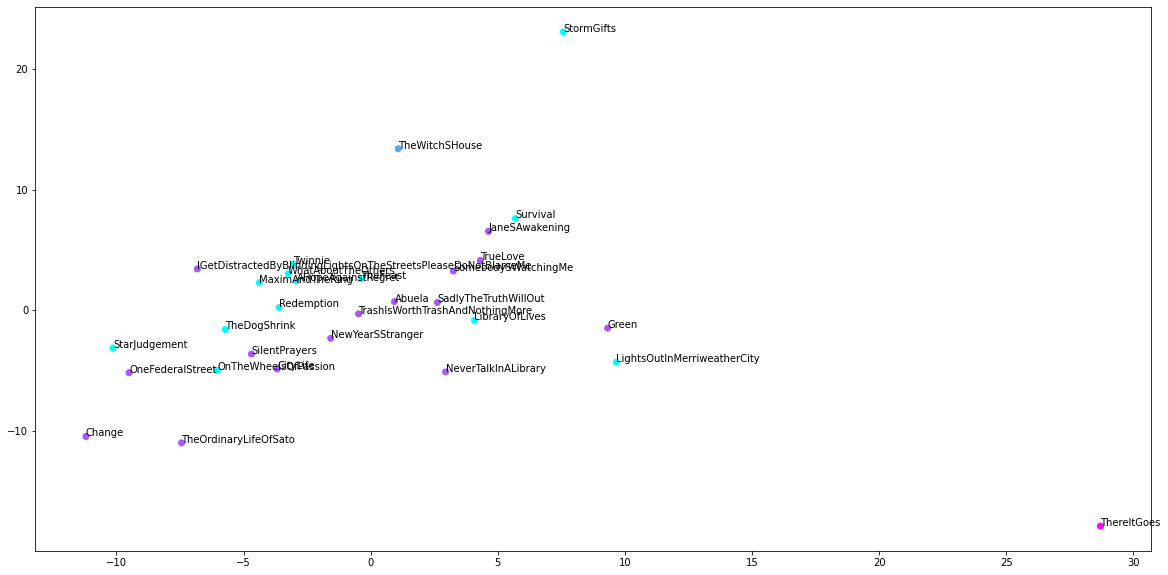

In [64]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

In [66]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,pron hair,pass,head
1,pron cheek,cheek,pron eye


Check relation of clusters to target

# Text to word, word to vector

In [70]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-200')

[==================================================] 100.0% 252.1/252.1MB downloaded


In [86]:
vocab = {v: k for k, v in vectorizer.vocabulary_.items()}


In [85]:
def embed_text(row):
    i=0
    best_words = vocab[row.argmax()].split(' ')
    
    final = np.zeros(200)
    for word in best_words:
        try:
            final += model[word]
        except:
            i+=1
            continue
    final = final/len(best_words)
    return final, i, " ".join(best_words)

In [89]:
# embeded_arr = [embed_text(row)[0] for row in X.toarray()]
embeded_arr = []
best_words = []
for index, row in X.iterrows():
    emb = embed_text(row)
    embeded_arr.append(emb[0])
    best_words.append(emb[-1])

In [90]:
pca = PCA(n_components=2)
pca_X2 = pca.fit_transform(embeded_arr)

In [91]:
n_clusters = 4

km = KMeans(random_state=0)
km.fit(embeded_arr)
clusters2 = km.labels_

In [92]:
best_words

['minute pron',
 'park',
 'mark',
 'despite',
 'book',
 'cat',
 'high',
 'tiny',
 'fire',
 'ice',
 'pron lie',
 'yellow',
 'pron hope',
 'stranger',
 'hospital',
 'sea',
 'figure',
 'son',
 'guy',
 'smell',
 'paint',
 'water pron',
 'silence',
 'possible',
 'garden',
 'mirror',
 'edge',
 'water',
 'king',
 'stomach']

In [93]:
import pylab

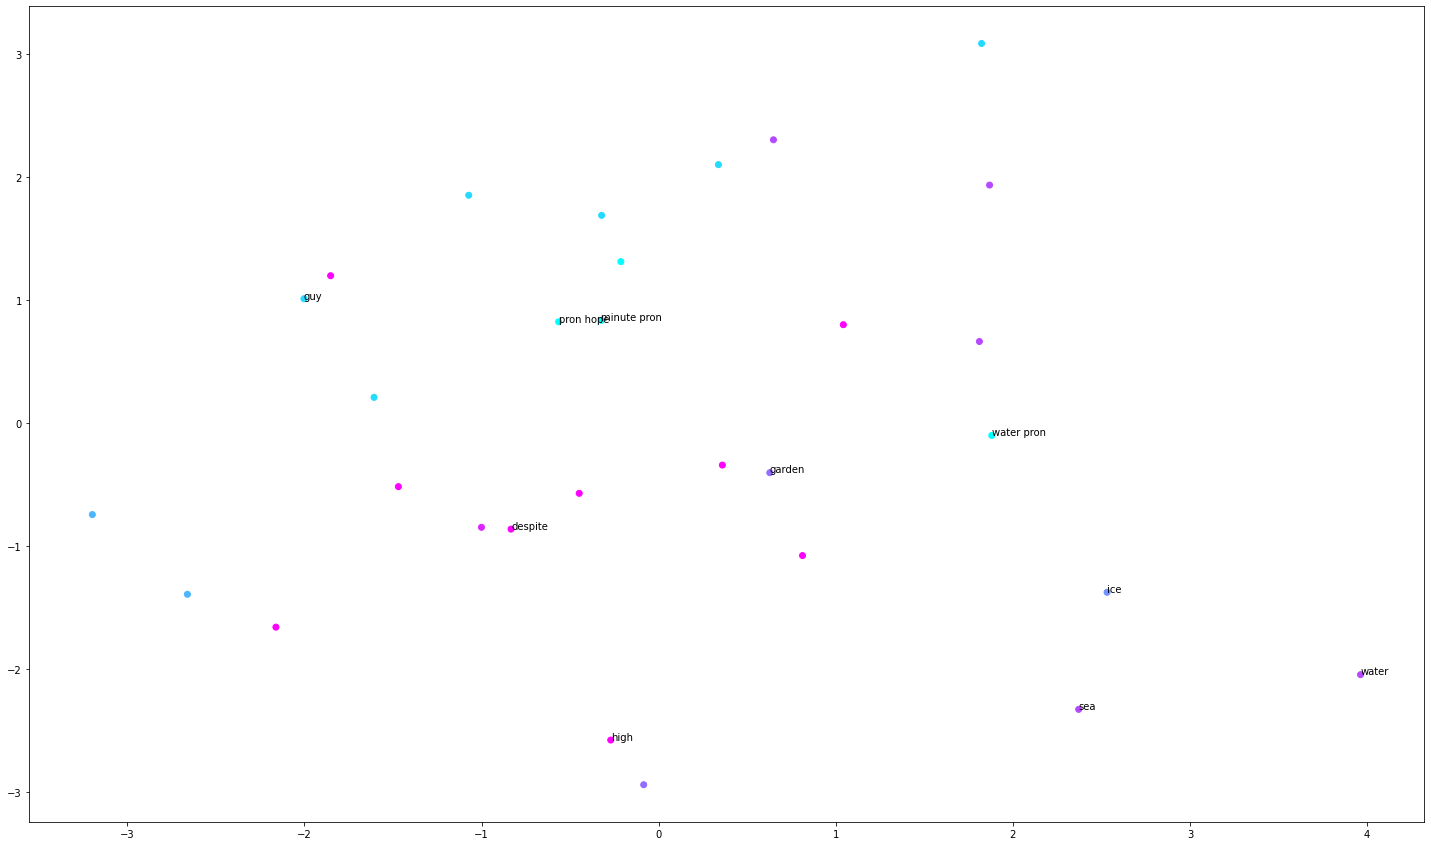

In [94]:
fig = plt.figure(figsize = (25, 15))
ax = fig.add_subplot(111)
ax.scatter(pca_X2[:, 0], pca_X2[:, 1], c = clusters2, cmap = pylab.cm.cool)
for i, word in enumerate(best_words):
    if i%3==0:
        ax.annotate(word, xy = (pca_X2[i, 0], pca_X2[i, 1]))
plt.show()

# text2vect, Kmeans and PCA visualization

In this section, we produce a visualization of the corpus of texts based on its semantic context.

We summarize each text by a vector, using gensim Doc2Vec api.

The visualization is obtained with kmeans clustering and PCA.

The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document’s doc-vector

https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

## Import texts

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv", usecols=['story_html'])

In [ ]:
from bs4 import BeautifulSoup
def get_story(row):
    # extracting story from html
    html = row['story_html']
    soup = BeautifulSoup(html, "html.parser")
    row['story'] = soup.get_text()
    return row


In [ ]:
stories = df.apply(get_story, axis=1)[['story']]

In [ ]:
texts = stories.story.to_list()

## Train the model

In [ ]:
import gensim.downloader as api
import gensim

In [ ]:
# preprocess

def read_corpus(text, tokens_only=False):
      for i, line in enumerate(text):
          tokens = gensim.utils.simple_preprocess(line)
          if tokens_only:
              yield tokens
          else:
              # For training data, add tags
              yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(texts))
len(train_corpus)

In [ ]:
# load model
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=5, epochs=10)

# build vocab
model.build_vocab(train_corpus)

In [ ]:
%%time
# train model
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 16min 13s, sys: 6.81 s, total: 16min 20s
Wall time: 8min 45s


A few examples:

In [ ]:
vector1 = model.infer_vector(['rat'])
print(vector1)

[-0.00028551 -0.00857184  0.01037268  0.00693584 -0.08809856 -0.08779433
 -0.12161116  0.04784663 -0.08825184 -0.03733197 -0.03574497 -0.01973002
  0.09468692 -0.02226037  0.0190661   0.06690324  0.00397203  0.03348624
  0.10174558  0.02743867  0.08825613  0.06501657 -0.10288417  0.01471154
  0.02526908 -0.03050199  0.10935216  0.06236402  0.10792499 -0.01704365
  0.07079046  0.05446685  0.09300351 -0.00995685 -0.07474986 -0.02688879
  0.01329137  0.0228958  -0.0117153  -0.01321074  0.01829609  0.0248468
 -0.07315603 -0.01684311  0.04963949 -0.05146542  0.04681132  0.03833691
 -0.07166122  0.10433557]


In [ ]:
vector2 = model.infer_vector(['Jojo', 'is', 'a', 'rat'])
print(vector2)

[ 3.52473445e-02  4.06649336e-02  1.62622775e-04 -1.71750858e-02
 -2.61866357e-02 -7.42732435e-02 -7.83883780e-02  6.77780434e-02
 -1.14307195e-01 -1.61117613e-01 -1.07815668e-01 -2.35696174e-02
  2.94084065e-02 -7.72348046e-02 -4.01403382e-02  8.17911252e-02
 -4.33724083e-04  7.16086552e-02  1.04606017e-01  5.08446954e-02
  1.27009973e-01  6.73848316e-02 -9.20429975e-02  6.12418391e-02
 -1.42196054e-02 -3.53431478e-02  1.34626657e-01  4.38504070e-02
  1.12284459e-01  2.48062201e-02  6.70080632e-02  9.09825321e-03
  1.14149682e-01  2.86301263e-02 -1.19464062e-01 -6.68263882e-02
  3.45130861e-02  7.16688186e-02 -1.27902832e-02 -9.68835037e-03
 -1.56141911e-02  3.16999555e-02 -8.69699940e-02  1.71119813e-02
  7.19097033e-02 -9.23582390e-02  6.65409565e-02  4.04060632e-02
 -1.27460599e-01  1.67703763e-01]


In [ ]:
import numpy as np
np.dot(vector1, vector2)

0.19589506

In [ ]:
np.linalg.norm(vector1 - vector2)

0.27514708

## Infer and add features

In [ ]:
%%time

data = []
for i in range(len(train_corpus)):
  data.append(model.infer_vector(train_corpus[i].words))

CPU times: user 9min 22s, sys: 692 ms, total: 9min 22s
Wall time: 9min 25s


In [ ]:
cols = [f'feat_{i}' for i in range(1,51)]

In [ ]:
df_50 = pd.DataFrame(data, columns = cols)

In [ ]:
df_50.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50
0,2.659484,-0.523605,-1.404203,-2.391710,-1.427656,1.256782,-0.262918,0.098928,-1.943198,-3.170513,...,-0.300519,-0.450661,1.022923,-0.465720,1.512374,2.292235,-0.304154,-1.089412,-1.146687,-0.330198
1,0.756721,-0.735245,0.930490,0.430159,0.920823,-0.517882,-1.637704,0.578778,0.981647,-1.794081,...,-0.862206,1.274044,-1.367507,0.929302,-0.290881,-0.791345,1.490387,0.367852,-1.791149,0.424740
2,-1.136603,-1.886631,-3.266066,0.037845,2.591342,0.640861,0.654232,0.792589,-0.929573,2.053419,...,-0.346342,1.235729,-2.328117,-1.659720,3.138215,-3.049757,2.102825,-0.147933,-2.446271,-0.291158
3,0.940223,0.204191,-1.529663,0.687877,-0.202320,-1.549609,-1.206502,0.506514,-1.014185,-0.249134,...,-1.428016,1.698065,1.434236,-0.135730,1.712987,-1.529778,1.497792,1.533599,0.306178,1.484685
4,1.288073,1.388954,2.586727,0.739471,0.513202,-2.528301,2.600472,5.204753,-1.283111,1.585567,...,2.196461,-0.102047,-0.109933,-0.258458,0.097764,-0.672371,1.226663,0.039536,-3.179453,0.666221


## Kmeans and PCA

In [ ]:
# choose the number of clusters
k = 4

# choose sample size
sample_size = 100

In [ ]:
X = df_50[cols].head(sample_size)
scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
# X = pd.DataFrame(data=X, columns=X.columns)

print(f'The shape of X is {X.shape}')



The shape of X is (100, 50)


In [ ]:
titles = list(range(sample_size))

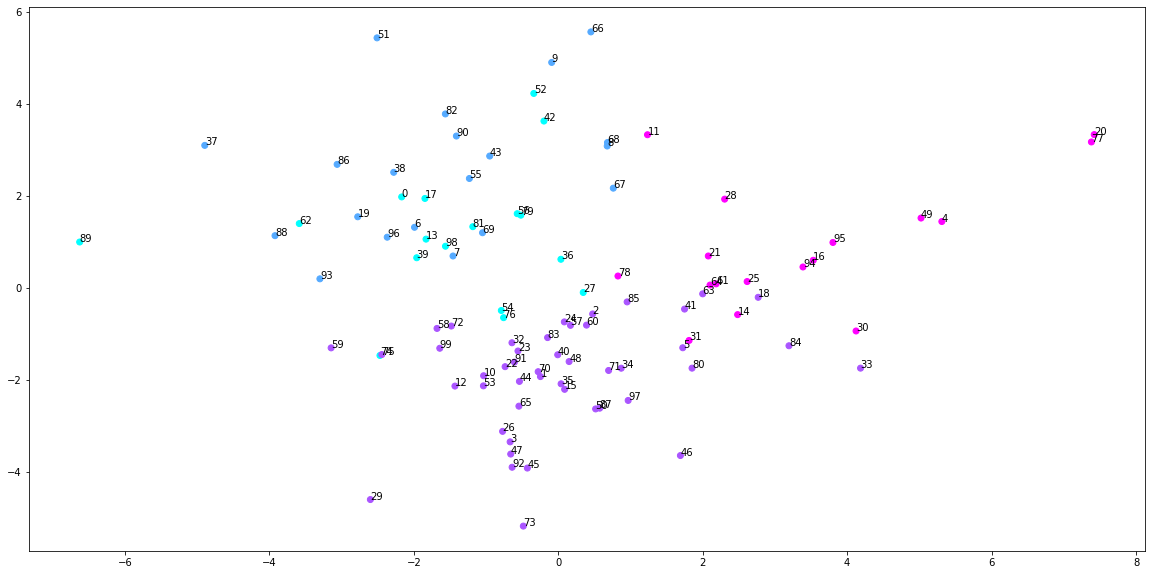

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

Stories 20 and 77 are very close, let's see why:

In [ ]:
i=20
print(stories.story[i])


Disclaimer - this is not a real Greek myth, I made it up, although the characters are real in Greek mythology. Hope you enjoy.Pontus was pacing, nervously. His crab-claw horns snapping restlessly upon his head. He was walking next to his favourite body of water; the Aegean Sea, but even that didn’t seem to calm him. Not nearly enough people have heard of Pontus. Although most of those people have heard of his ‘all-powerful’, ‘master of the sea’ son, Poseidon. Pontus thought this begrudgingly. Who did those people think gave him those powers? You see, Pontus was the original sea god. Although, the term ‘sea god’ did not do Pontus justice at all, because, in fact, Pontus was the sea.With every pace along the Aegean Sea coast, the sea rippled, as though sensing Pontus’s stress. Not much made a god anxious, but a meeting with your mother would certainly do it. His mother was omnipotent but certainly not benevolent. She was an all-consuming, evil deity, named Gaia. However now, most people

In [ ]:
i=77
print(stories.story[i])


The man’s face bore a pressed expression and his narrow boots, shifting ever so slightly in the sand, looked toward the jungle surrounding a blue mountain, whose summit was hidden by an evening mist. His ship lay anchored afar, and his men slushed through the gravity of frigid water behind him, their sheathed sabers clinking against their belts, strapped around foam drenched pale shirts and muddy breeches. “This is it here boys” whistled out from the captain’s cracked teeth, and his men, against the sharp crystal sea, looked forward in anguish; this being a so-far fruitless campaign having spanned several dreary months, armed ships were not far, and so they had at most five days to set camp, find treasure, load it on the ship, and to rapidly depart. 
A campfire was drawn in the center of the crescent-shaped beach, and the gentle lapping of waves blended into the chatter of men and the soft crackling of flames. The sun set down over the glistening sea, its purple rays dancing across th

3 and 26 too

In [ ]:
i=3
print(stories.story[i])


 The Shiva, 1955
 
	For the rest of her life, the smell of pickles and pastrami would be the smell of death.
	Irene was 13 years old, and her mother was dead. Even after everything – the ambulance, the hospital, the horrible evidence of her relatives taking turns shoveling dirt onto the coffin, Irene couldn’t believe that her mother was really gone. Now there were all these people (so many people!) gathered back at the house, nibbling on plates of deli meat and coleslaw, talking about Mama in the past tense. For a moment, she wondered if it was all an elaborate joke they were playing on her. Maybe Millie was just outside, returning from an extended trip to the market, and she would suddenly burst through the door, arms full of grocery bags, shouting “Sorry I’m late!”
	But no, that couldn’t be right. Irene pictured the men, lifting the pine box out of the hearse, and she knew the truth. She slumped at the buffet that had been laid out on the dining room table, the stench of raw onions 

In [ ]:
i=26
print(stories.story[i])


	“We’ve called you in here today to discuss the concerns that numerous parents have voiced over the past few weeks,” Scott said calmly to Nadia as he crossed one leg over the other. Nadia glanced at Scott, the head of Trinity Lincoln School, and then looked at the other members of the board in front of her. They were all coincidentally white, leaving Nadia as the sole, brown-skinned person in the room. Nadia couldn’t help but notice that her colleagues all somehow looked like someone jammed a pole right up each of their asses and they couldn’t quite get comfortable. She knew why she was called in here today. But she didn’t know why they needed six members of the faculty to speak to her about it. She felt like she was on trial for murder, not a teacher speaking to her supposed associates.  
 
	“Concerns?” Nadia asked innocently, deciding to take the naïve approach. She knew damned well that there were parents complaining about her. But that wasn’t her problem, it was theirs. If parents

In [ ]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,feat_10,feat_37,feat_41
1,feat_29,feat_28,feat_17
